In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [23]:
path = r'./data/StudentsPerformance.csv'
df = pd.read_csv(path)

In [24]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
df.columns = ('gender','race','parental_edu','lunch','test_course','math','reading','writing')

cluster data

In [26]:
X = df[['math','reading','writing']]

K-means with three cluster

In [27]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [28]:
km.labels_

array([0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0,
       0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0,
       1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2,
       2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2,
       0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1,
       0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 1,

In [29]:
df['cluster'] = km.labels_
df.sort_values('cluster')

,gender,race,parental_edu,lunch,test_course,math,reading,writing,cluster
0,female,group B,bachelor's degree,standard,none,72,72,74,0
529,female,group C,associate's degree,standard,none,62,74,70,0
530,female,group C,associate's degree,standard,completed,68,67,73,0
532,male,group E,associate's degree,standard,completed,62,61,58,0
534,male,group B,high school,standard,completed,73,69,68,0
...,...,...,...,...,...,...,...,...,...
298,male,group C,high school,free/reduced,completed,40,46,50,2
690,female,group C,associate's degree,standard,none,49,53,53,2
688,male,group A,high school,free/reduced,none,53,58,44,2
76,male,group E,some high school,standard,none,30,26,22,2


In [30]:
km.cluster_centers_

array([[65.35730337, 68.52359551, 67.84719101],
       [81.79411765, 85.16013072, 84.27777778],
       [48.09638554, 50.67068273, 48.48594378]])

In [31]:
centers = df.groupby('cluster').mean()

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [33]:
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

Text(0, 0.5, 'reading')

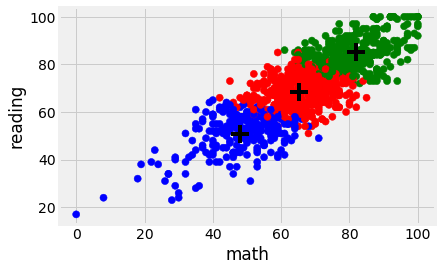

In [34]:
plt.scatter(df.math, df.reading, c=colors[df.cluster], s=50);

# Cluster centers, marked by "+"
plt.scatter(centers.math, centers.reading, linewidths=3, marker='+', s=300, c='black');

# Add labels.
plt.xlabel('math')
plt.ylabel('reading')

scatter plot

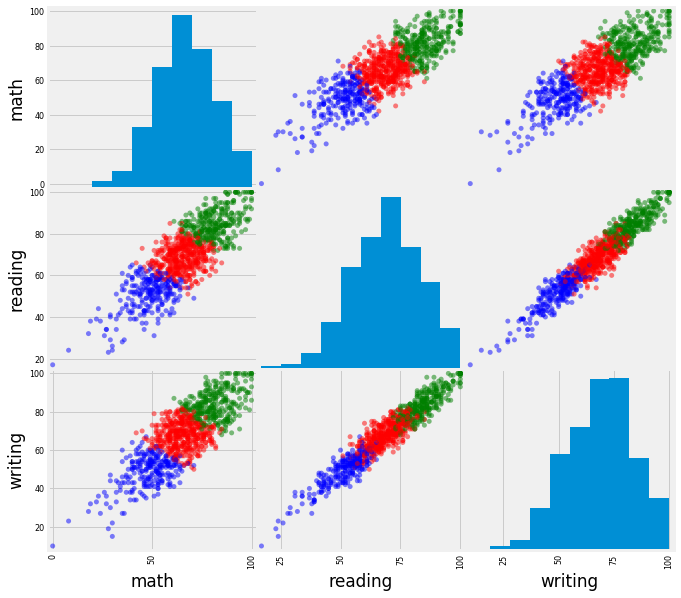

In [35]:
from pandas.plotting import scatter_matrix

scatter_matrix(X, c=colors[df.cluster], figsize=(10,10), s=100);

center and scale data

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [38]:
X_scaled

array([[ 0.39002351,  0.19399858,  0.39149181],
       [ 0.19207553,  1.42747598,  1.31326868],
       [ 1.57771141,  1.77010859,  1.64247471],
       ...,
       [-0.46775108,  0.12547206, -0.20107904],
       [ 0.12609287,  0.60515772,  0.58901542],
       [ 0.71993682,  1.15336989,  1.18158627]])

In [39]:
df['cluster'] = km.labels_
df.sort_values('cluster')

,gender,race,parental_edu,lunch,test_course,math,reading,writing,cluster
999,female,group D,some college,free/reduced,none,77,86,86,0
833,female,group B,high school,standard,completed,77,82,89,0
837,female,group A,high school,standard,completed,75,82,79,0
382,male,group C,master's degree,free/reduced,none,79,81,71,0
381,male,group C,associate's degree,standard,completed,87,100,95,0
...,...,...,...,...,...,...,...,...,...
471,female,group C,high school,standard,none,63,69,74,2
473,female,group D,some high school,standard,none,59,67,61,2
476,male,group E,bachelor's degree,standard,completed,76,62,66,2
454,female,group C,associate's degree,free/reduced,none,53,61,62,2


In [40]:
df.groupby('cluster').mean()

,math,reading,writing
cluster,,,
0,81.714286,85.146104,84.207792
1,48.096386,50.670683,48.485944
2,65.338600,68.458239,67.821670


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209E1F2A2C8>,
      dtype=object)

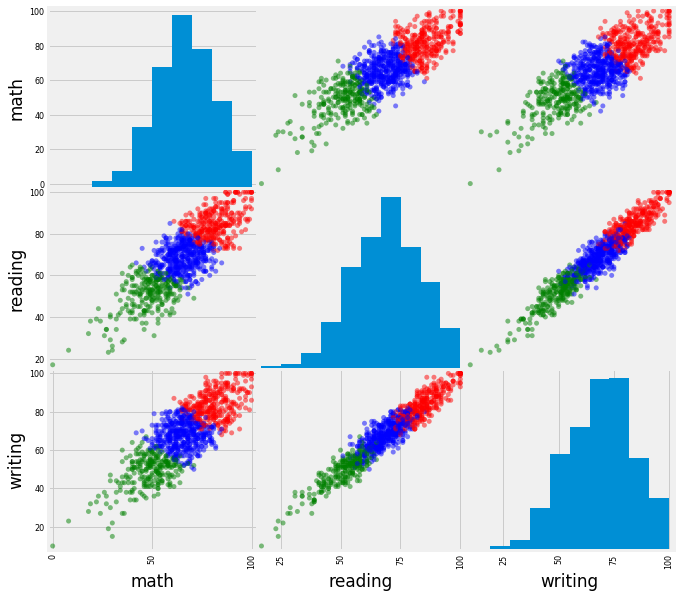

In [41]:
scatter_matrix(X, c=colors[df.cluster], figsize=(10,10), s=100)

DBSCAN: Density-Based Clustering¶

In [44]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=3)
db.fit(X_scaled)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [45]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [46]:
df['cluster'] = km.labels_
df.sort_values('cluster')

,gender,race,parental_edu,lunch,test_course,math,reading,writing,cluster
999,female,group D,some college,free/reduced,none,77,86,86,0
833,female,group B,high school,standard,completed,77,82,89,0
837,female,group A,high school,standard,completed,75,82,79,0
382,male,group C,master's degree,free/reduced,none,79,81,71,0
381,male,group C,associate's degree,standard,completed,87,100,95,0
...,...,...,...,...,...,...,...,...,...
471,female,group C,high school,standard,none,63,69,74,2
473,female,group D,some high school,standard,none,59,67,61,2
476,male,group E,bachelor's degree,standard,completed,76,62,66,2
454,female,group C,associate's degree,free/reduced,none,53,61,62,2


In [47]:
df.groupby('cluster').mean()

,math,reading,writing
cluster,,,
0,81.714286,85.146104,84.207792
1,48.096386,50.670683,48.485944
2,65.338600,68.458239,67.821670


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209E21ED4C8>,
      dtype=object)

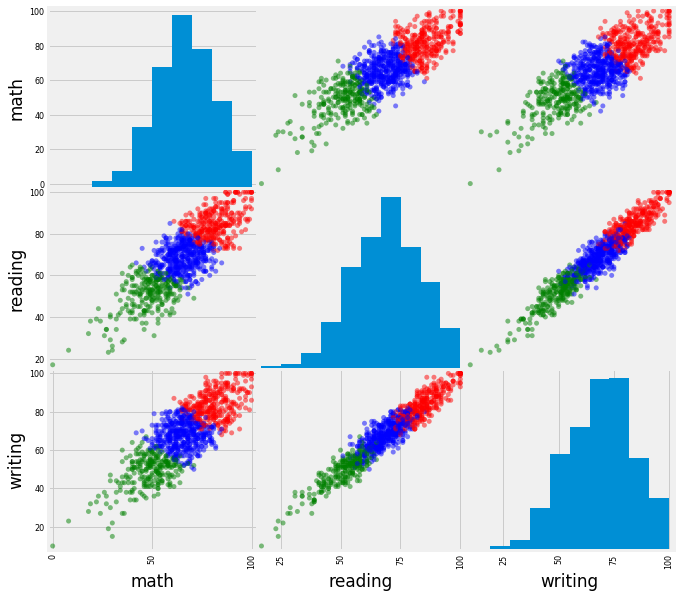

In [48]:
scatter_matrix(X, c=colors[df.cluster], figsize=(10,10), s=100)

Hierarchical Clustering

In [49]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(X_scaled)
labels = agg.labels_

In [50]:
df['cluster'] = agg.labels_
df.sort_values('cluster')

,gender,race,parental_edu,lunch,test_course,math,reading,writing,cluster
461,male,group B,some college,free/reduced,none,54,54,45,0
807,female,group E,high school,free/reduced,none,41,45,40,0
457,male,group D,associate's degree,free/reduced,none,53,54,48,0
112,male,group A,associate's degree,standard,none,54,53,47,0
113,female,group D,some college,standard,none,51,58,54,0
...,...,...,...,...,...,...,...,...,...
165,female,group C,bachelor's degree,standard,completed,96,100,100,3
702,male,group A,bachelor's degree,standard,completed,87,84,87,3
700,female,group E,bachelor's degree,standard,completed,79,81,82,3
695,female,group D,some college,free/reduced,none,79,89,86,3


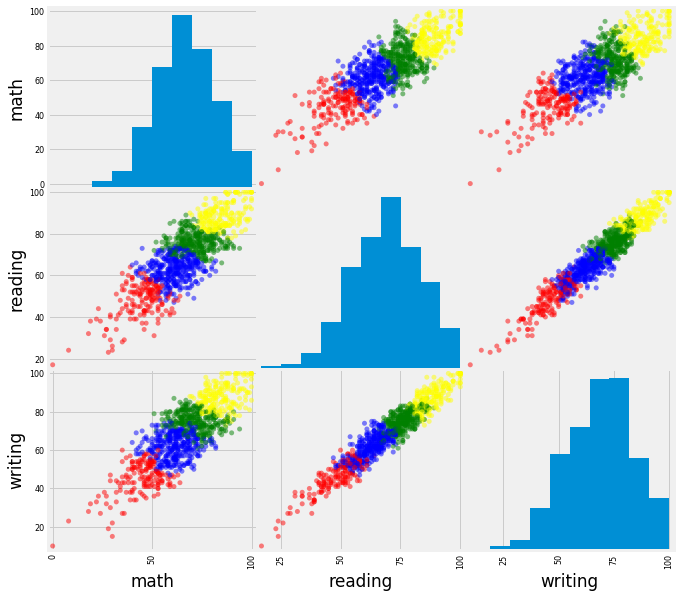

In [51]:
scatter_matrix(X, c=colors[df.cluster], figsize=(10,10), s=100);

Clustering Metrics¶

In [52]:
%matplotlib inline


import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression

In [53]:
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

C:\Users\zhang\anaconda3\lib\site-packages\scipy\stats\_multivariate.py:660: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


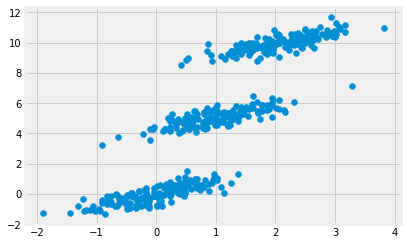

In [54]:
from scipy.stats import multivariate_normal
data = []
dist = multivariate_normal(mean=[0, 0], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    p = list(dist.rvs())
    data.append(dist.rvs())
dist = multivariate_normal(mean=[1, 5], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[2, 10], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    data.append(dist.rvs())

    
df = pd.DataFrame(data, columns=["x", "y"])
df.head()
plt.scatter(df['x'], df['y'])
plt.show()

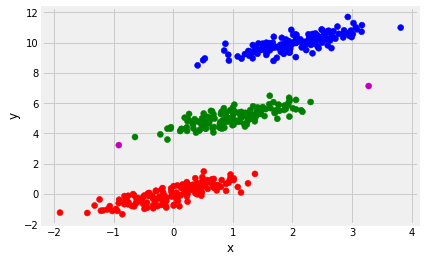

In [55]:
# Fit a DBSCAN estimator.
estimator = DBSCAN(eps=0.8, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute.
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [56]:
df["cluster"] = labels
df = pd.concat([df, pd.get_dummies(df['cluster'], prefix="cluster")], axis=1)
df

,x,y,cluster,cluster_-1,cluster_0,cluster_1,cluster_2
0,0.122238,-0.099338,0,0,1,0,0
1,0.066499,0.563193,0,0,1,0,0
2,0.885603,0.207710,0,0,1,0,0
3,-0.024343,-0.155314,0,0,1,0,0
4,-1.023749,-1.120673,0,0,1,0,0
...,...,...,...,...,...,...,...
445,1.985057,9.861085,2,0,0,0,1
446,1.145594,8.951413,2,0,0,0,1
447,1.284298,9.431523,2,0,0,0,1
448,2.256633,10.132433,2,0,0,0,1


In [57]:
model = LinearRegression()
X = df[["x", "cluster_0", "cluster_1", "cluster_2"]]
y = df['y']
model.fit(X, y)

print((model.score(X, y)))

0.9925174577942832


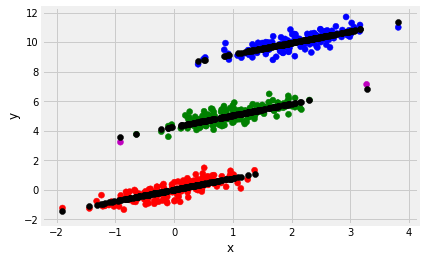

In [58]:
colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(df["x"], model.predict(X), color='black')

plt.show()

0.7585396331388752


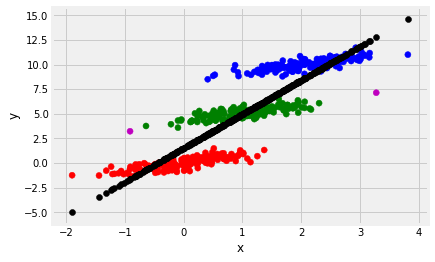

In [59]:
model = LinearRegression()
X = df[["x"]]
y = df['y']
model.fit(X, y)
print((model.score(X, y)))

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(df["x"], model.predict(X), color='black')

plt.show()